## Feature engineering

N-grams

In [12]:
import pandas as pd
import numpy as np

In [13]:
training = pd.read_csv("../data/processed/training.csv")
testing = pd.read_csv("../data/processed/testing.csv")

In [14]:
training.head(2)

,body,cleaned_body,label,tokens
0,Subject: off site with john griebling ' s opti...,subject off site with john griebling s optical...,0,"['subject', 'site', 'john', 'griebling', 'opti..."
1,Author: metze\nDate: 2007-04-27 14:23:08 +0000...,author metze new revision websvn log pass down...,0,"['author', 'metze', 'new', 'revision', 'websvn..."


In [15]:
testing.head(2)

,body,cleaned_body,label,tokens
0,"john ,\nthe more i look at these comparisons ,...",john the more i look at these comparisons the ...,0,"['john', 'look', 'comparison', 'convinced', 'a..."
1,On Friday 22 February 2008 15:46:06 Philipp Th...,on friday february philipp thomas wrote stan g...,0,"['friday', 'february', 'philipp', 'thomas', 'w..."


In [16]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [17]:
from sklearn.pipeline import FeatureUnion
from scipy.sparse import hstack 

In [18]:
X_text = training['cleaned_body']
y = training['label']

Using CountVectorizer

In [19]:
word_vectorizer = CountVectorizer(ngram_range=(1, 3), max_features=1000, stop_words='english', min_df = 5, max_df = 0.8)
char_vectorizer = CountVectorizer(analyzer='char', ngram_range=(3, 5), max_features=500, min_df = 10, max_df = 0.7) 

In [20]:
X_word_grams = word_vectorizer.fit_transform(X_text)
X_char_grams = char_vectorizer.fit_transform(X_text)

X_combined_sparse = hstack([X_word_grams, X_char_grams])

In [21]:
word_feature_names = word_vectorizer.get_feature_names_out()
char_feature_names = char_vectorizer.get_feature_names_out()

print(f"Number of word features: {len(word_feature_names)}")
print(f"First 5 word features: {list(word_feature_names[:5])}")

print(f"\nNumber of character features: {len(char_feature_names)}")
print(f"First 10 character features: {list(char_feature_names[:10])}")

combined_feature_names = list(word_feature_names) + list(char_feature_names)

print(f"\nTotal number of combined features: {len(combined_feature_names)}")
print(f"Corresponds to X_combined_sparse shape: {X_combined_sparse.shape}")

Number of word features: 1000
First 5 word features: ['able', 'access', 'according', 'account', 'act']

Number of character features: 500
First 10 character features: [' ac', ' ad', ' al', ' all', ' ar', ' are', ' are ', ' as', ' as ', ' at']

Total number of combined features: 1500
Corresponds to X_combined_sparse shape: (100784, 1500)


In [22]:
word_feature_names = word_vectorizer.get_feature_names_out()
word_counts = np.array(X_word_grams.sum(axis=0)).flatten()
word_feature_counts = pd.DataFrame({'feature': word_feature_names, 'count': word_counts})
print("--- Top 20 Words (CountVectorizer) ---")
print(word_feature_counts.sort_values(by='count', ascending=False).head(20))

--- Top 20 Words (CountVectorizer) ---
         feature  count
242        enron  49896
235        email  47786
542          new  45398
444         list  37245
227          ect  36452
883         time  34488
435         like  33539
919          use  32918
403         just  30101
371  information  29860
138      company  29138
501      message  28680
831      subject  28321
411         know  26446
537         need  25529
473         make  24550
990        wrote  24116
736         said  24055
77      business  23582
119          com  22664


In [23]:
char_feature_names = char_vectorizer.get_feature_names_out()
char_counts = np.array(X_char_grams.sum(axis=0)).flatten()
char_feature_counts = pd.DataFrame({'feature': char_feature_names, 'count': char_counts})
print("--- Top 20 Characters (CountVectorizer) ---")
print(char_feature_counts.sort_values(by='count', ascending=False).head(20))

--- Top 20 Characters (CountVectorizer) ---
    feature   count
331     of   481911
64      of   476954
461     tio  438978
462    tion  435982
271    ion   375604
404     s t  357179
98       wi  345624
46      in   339519
434     t t  312277
116     al   312196
197     e s  310281
135     ati  309539
186     e i  304541
308     n t  299890
168     d t  299854
352     our  298447
130     as   295858
77       se  294534
442     ter  292531
66       on  287379


Using TfidfVectorizer

In [24]:
word_vectorizer_tfidf = TfidfVectorizer(ngram_range=(1, 3), max_features=1000, stop_words='english', min_df = 5, max_df = 0.8, sublinear_tf=True)
char_vectorizer_tfidf = TfidfVectorizer(analyzer='char', ngram_range=(3, 5), max_features=500, min_df = 10, max_df = 0.7, sublinear_tf=True)

In [25]:
X_word_grams_tfidf = word_vectorizer_tfidf.fit_transform(X_text)
X_char_grams_tfidf = char_vectorizer_tfidf.fit_transform(X_text)

X_combined_sparse_tfidf = hstack([X_word_grams_tfidf, X_char_grams_tfidf])


In [26]:
word_feature_names_tfidf = word_vectorizer_tfidf.get_feature_names_out()
char_feature_names_tfidf = char_vectorizer_tfidf.get_feature_names_out()

print(f"Number of word features: {len(word_feature_names_tfidf)}")
print(f"First 5 word features: {list(word_feature_names_tfidf[:5])}")

print(f"\nNumber of character features: {len(char_feature_names_tfidf)}")
print(f"First 10 character features: {list(char_feature_names_tfidf[:10])}")

combined_feature_names_tfidf = list(word_feature_names_tfidf) + list(char_feature_names_tfidf)

print(f"\nTotal number of combined features: {len(combined_feature_names_tfidf)}")
print(f"Corresponds to X_combined_sparse shape: {X_combined_sparse_tfidf.shape}")

Number of word features: 1000
First 5 word features: ['able', 'access', 'according', 'account', 'act']

Number of character features: 500
First 10 character features: [' ac', ' ad', ' al', ' all', ' ar', ' are', ' are ', ' as', ' as ', ' at']

Total number of combined features: 1500
Corresponds to X_combined_sparse shape: (100784, 1500)


In [27]:
word_total_tfidf = np.array(X_word_grams_tfidf.sum(axis=0)).flatten()
word_tfidf_df = pd.DataFrame({
    'word_ngram': word_feature_names_tfidf,
    'total_tfidf_score': word_total_tfidf
}).sort_values(by='total_tfidf_score', ascending=False)

print(f"--- Top 20 Words (TF-IDF) ---")
print(word_tfidf_df.head(20))

--- Top 20 Words (TF-IDF) ---
       word_ngram  total_tfidf_score
235         email        2659.547459
444          list        2273.415760
542           new        2264.969548
435          like        2232.482608
403          just        2097.829382
883          time        2092.696300
990         wrote        2020.873956
919           use        1982.633000
411          know        1862.635129
872        thanks        1813.379287
537          need        1811.614455
501       message        1783.396731
831       subject        1777.712725
468       mailing        1673.539987
946          want        1669.773026
473          make        1641.420793
469  mailing list        1614.785668
178           day        1602.618789
58           best        1597.909289
371   information        1588.924414


In [28]:
char_total_tfidf = np.array(X_char_grams_tfidf.sum(axis=0)).flatten()
char_tfidf_df = pd.DataFrame({
    'char_ngram': char_feature_names_tfidf,
    'total_tfidf_score': char_total_tfidf
}).sort_values(by='total_tfidf_score', ascending=False)

print(f"--- Top 20 Characters (TF-IDF) ---")
print(char_tfidf_df.head(20))

--- Top 20 Characters (TF-IDF) ---
    char_ngram  total_tfidf_score
352        our        4444.030340
331        of         4415.704431
461        tio        4406.678704
462       tion        4394.294327
64         of         4389.544432
347        ou         4325.345953
497       you         4214.261110
107       you         4184.587768
98          wi        4154.863913
197        e s        4089.655639
66          on        4078.672149
404        s t        4055.727421
186        e i        4049.690988
271       ion         4033.976709
474        ur         4028.414592
410        se         4028.243098
434        t t        4023.361578
353       our         3991.401200
227       for         3985.738914
31        for         3971.779149


Conclusion:
- TF-IDF is able to ignore noise in data and provide more insightful for analysis by words
- Similar results for characters analysis

Hence using TF-IDF should be preferred.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

Comparing Word N-grams

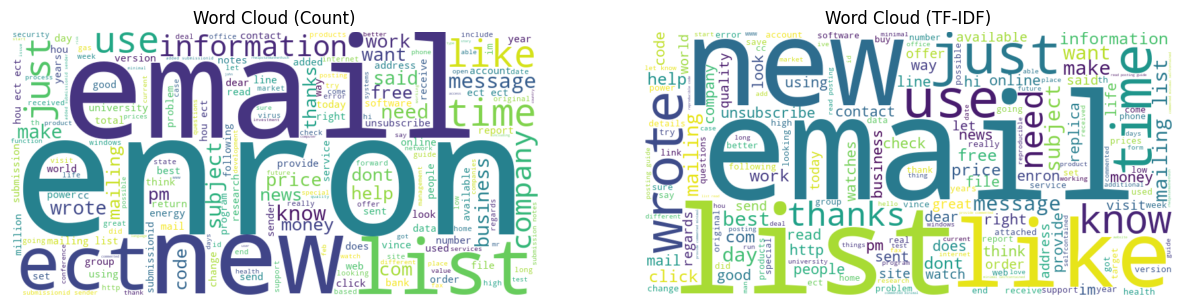

In [44]:
count_dict = dict(zip(word_feature_counts['feature'], word_feature_counts['count']))
tfidf_dict = dict(zip(word_tfidf_df['word_ngram'], word_tfidf_df['total_tfidf_score']))

wordcloud_count = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(count_dict)
wordcloud_tfidf = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_dict)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_count, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud (Count)")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_tfidf, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud (TF-IDF)")
plt.show()

C:\Users\yingo\AppData\Local\Temp\ipykernel_13348\485990618.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='feature', data=top_count, palette="Blues_d")
C:\Users\yingo\AppData\Local\Temp\ipykernel_13348\485990618.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_tfidf_score', y='word_ngram', data=top_tfidf, palette="Reds_d")


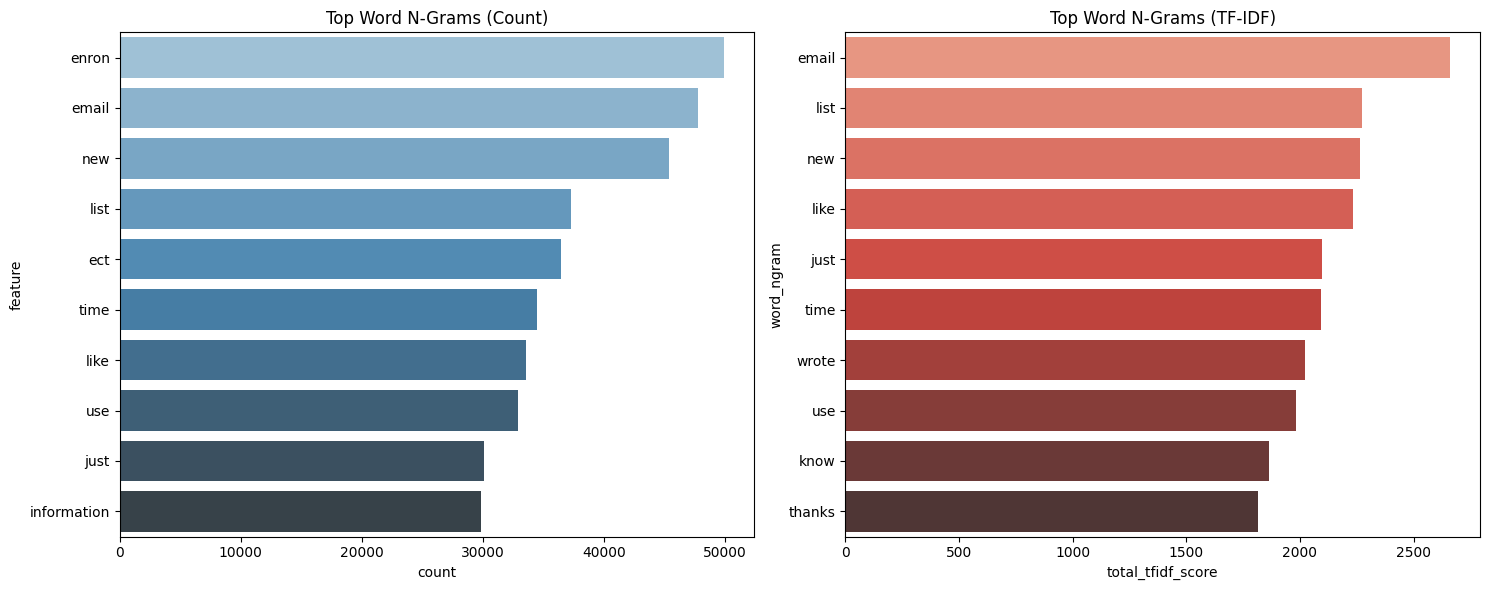

In [37]:
top_count = word_feature_counts.sort_values('count', ascending=False).head(10)
top_tfidf = word_tfidf_df.sort_values('total_tfidf_score', ascending=False).head(10)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='count', y='feature', data=top_count, palette="Blues_d")
plt.title("Top Word N-Grams (Count)")

plt.subplot(1, 2, 2)
sns.barplot(x='total_tfidf_score', y='word_ngram', data=top_tfidf, palette="Reds_d")
plt.title("Top Word N-Grams (TF-IDF)")
plt.tight_layout()
plt.show()

Comparing Character N-grams

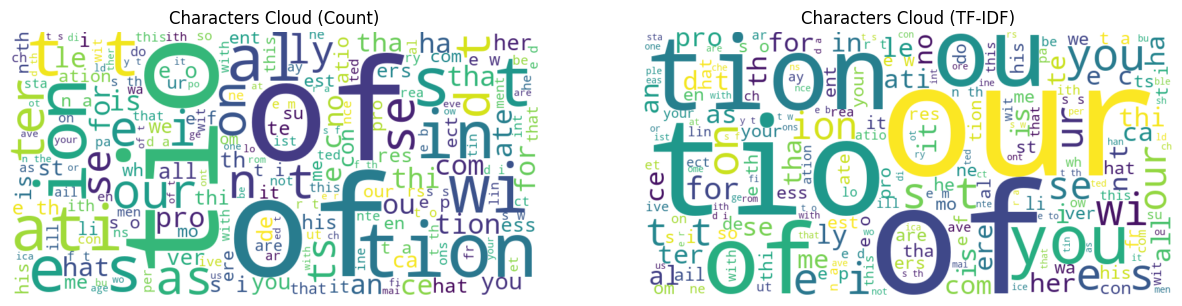

In [46]:
count_dict = dict(zip(char_feature_counts['feature'], char_feature_counts['count']))
tfidf_dict = dict(zip(char_tfidf_df['char_ngram'], char_tfidf_df['total_tfidf_score']))

charcloud_count = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(count_dict)
charcloud_tfidf = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_dict)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.imshow(charcloud_count, interpolation='bilinear')
plt.axis("off")
plt.title("Characters Cloud (Count)")

plt.subplot(1, 2, 2)
plt.imshow(charcloud_tfidf, interpolation='bilinear')
plt.axis("off")
plt.title("Characters Cloud (TF-IDF)")
plt.show()

C:\Users\yingo\AppData\Local\Temp\ipykernel_13348\2949569615.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='feature', data=top_count, palette="Blues_d")
C:\Users\yingo\AppData\Local\Temp\ipykernel_13348\2949569615.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_tfidf_score', y='char_ngram', data=top_tfidf, palette="Reds_d")


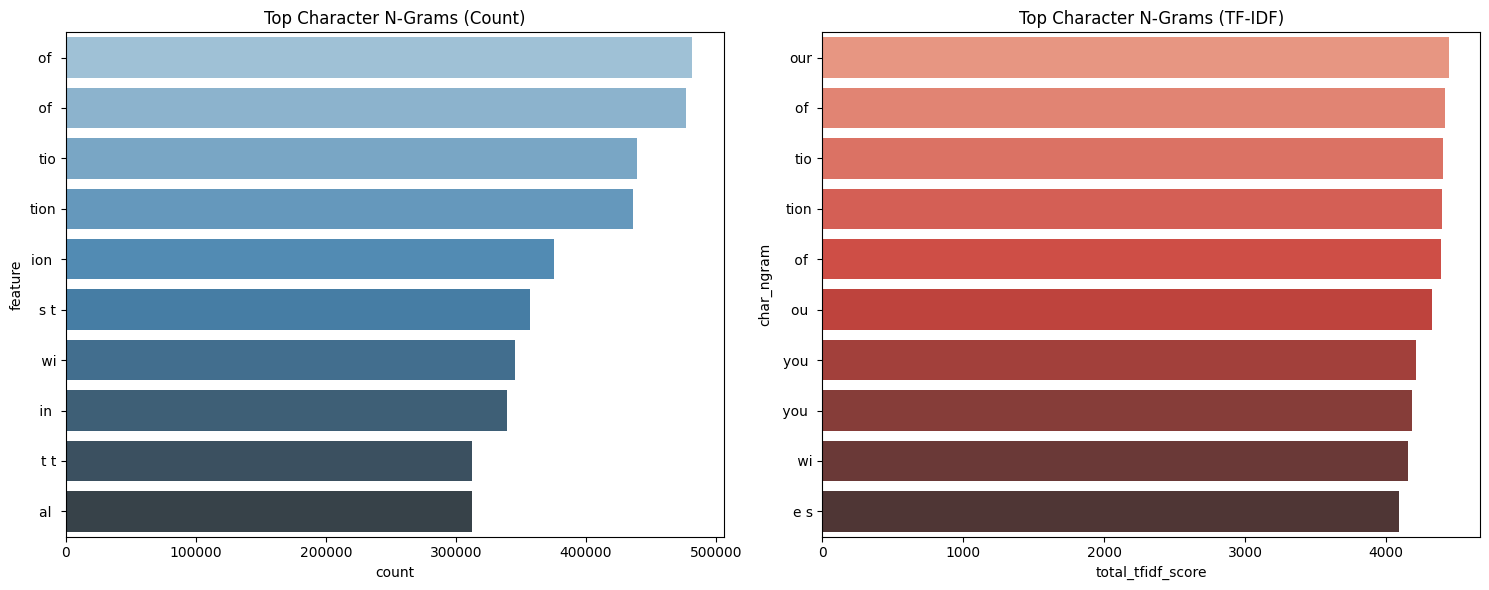

In [40]:
top_count = char_feature_counts.sort_values('count', ascending=False).head(10)
top_tfidf = char_tfidf_df.sort_values('total_tfidf_score', ascending=False).head(10)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='count', y='feature', data=top_count, palette="Blues_d")
plt.title("Top Character N-Grams (Count)")

plt.subplot(1, 2, 2)
sns.barplot(x='total_tfidf_score', y='char_ngram', data=top_tfidf, palette="Reds_d")
plt.title("Top Character N-Grams (TF-IDF)")
plt.tight_layout()
plt.show()

In [47]:
from scipy.sparse import csr_matrix

In [48]:
training_tfidf = training.copy()

In [49]:
to_add = csr_matrix(X_word_grams_tfidf)
training_tfidf['body_tfidf'] = [row for row in to_add]

to_add2 = csr_matrix(X_char_grams_tfidf)
training_tfidf['body_char_tfidf'] = [row for row in to_add2]

training_tfidf.head()

,body,cleaned_body,label,tokens,body_tfidf,body_char_tfidf
0,Subject: off site with john griebling ' s opti...,subject off site with john griebling s optical...,0,"['subject', 'site', 'john', 'griebling', 'opti...","(0, 831)\t0.07180768530448348\n (0, 790)\t0...","(0, 424)\t0.03481832019111312\n (0, 206)\t0..."
1,Author: metze\nDate: 2007-04-27 14:23:08 +0000...,author metze new revision websvn log pass down...,0,"['author', 'metze', 'new', 'revision', 'websvn...","(0, 671)\t0.43648017825283475\n (0, 48)\t0....","(0, 439)\t0.13160465654773695\n (0, 146)\t0..."
2,"with the holidays quickly approaching , enron ...",with the holidays quickly approaching enron tr...,0,"['holiday', 'quickly', 'approaching', 'enron',...","(0, 365)\t0.10585982325492739\n (0, 601)\t0...","(0, 159)\t0.05733874751940442\n (0, 431)\t0..."
3,The Bayesian AI group at Monash University is ...,the bayesian ai group at monash university is ...,0,"['bayesian', 'ai', 'group', 'monash', 'univers...","(0, 541)\t0.25803630820234624\n (0, 36)\t0....","(0, 416)\t0.07890075252138798\n (0, 290)\t0..."
4,Mike Meyer wrote:\n> Trying to install it from...,mike meyer wrote trying to install it from the...,0,"['mike', 'meyer', 'wrote', 'trying', 'install'...","(0, 542)\t0.13741301079189092\n (0, 912)\t0...","(0, 424)\t0.07236663126405836\n (0, 431)\t0..."


In [50]:
training_countvec = training.copy()

In [51]:
to_add3 = csr_matrix(X_word_grams)
training_countvec['body_countvec'] = [row for row in to_add3]

to_add4 = csr_matrix(X_char_grams)
training_countvec['body_char_countvec'] = [row for row in to_add4]

training_countvec.head()

,body,cleaned_body,label,tokens,body_countvec,body_char_countvec
0,Subject: off site with john griebling ' s opti...,subject off site with john griebling s optical...,0,"['subject', 'site', 'john', 'griebling', 'opti...","(0, 831)\t1\n (0, 790)\t1\n (0, 397)\t5\n ...","(0, 424)\t1\n (0, 206)\t5\n (0, 159)\t3\n ..."
1,Author: metze\nDate: 2007-04-27 14:23:08 +0000...,author metze new revision websvn log pass down...,0,"['author', 'metze', 'new', 'revision', 'websvn...","(0, 671)\t4\n (0, 48)\t1\n (0, 542)\t1\n ...","(0, 439)\t8\n (0, 146)\t5\n (0, 60)\t1\n ..."
2,"with the holidays quickly approaching , enron ...",with the holidays quickly approaching enron tr...,0,"['holiday', 'quickly', 'approaching', 'enron',...","(0, 365)\t1\n (0, 601)\t1\n (0, 289)\t1\n ...","(0, 159)\t2\n (0, 431)\t1\n (0, 276)\t2\n ..."
3,The Bayesian AI group at Monash University is ...,the bayesian ai group at monash university is ...,0,"['bayesian', 'ai', 'group', 'monash', 'univers...","(0, 541)\t1\n (0, 36)\t1\n (0, 320)\t1\n ...","(0, 416)\t1\n (0, 290)\t1\n (0, 252)\t2\n ..."
4,Mike Meyer wrote:\n> Trying to install it from...,mike meyer wrote trying to install it from the...,0,"['mike', 'meyer', 'wrote', 'trying', 'install'...","(0, 542)\t1\n (0, 912)\t1\n (0, 509)\t1\n ...","(0, 424)\t1\n (0, 431)\t2\n (0, 416)\t2\n ..."


In [53]:
# training.head()

Saving ngrams results to pickle file for future use

In [54]:
import pickle

In [55]:
training_countvec.to_pickle("../data/interim/training_ngrams_countvec.pkl")
training_tfidf.to_pickle("../data/interim/training_ngrams_tfidf.pkl")